In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn import datasets
breastcanc= datasets.load_breast_cancer()
breastcanc

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [3]:
x=breastcanc.data
y=breastcanc.target

In [4]:
df=pd.DataFrame(x)

In [5]:
df.columns=breastcanc.feature_names
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
from sklearn import model_selection
Xtrain,Xtest,Ytrain,Ytest=model_selection.train_test_split(df,y,random_state = 0)

In [7]:
Xtest.shape,Xtrain.shape

((143, 30), (426, 30))

In [8]:
import math

In [9]:
def step_grad(x,y,learning_rate,m):
    m_slope=np.zeros(x.shape[1])
    M=(x.shape[0])
    for i in range(M):
        x1 = x.iloc[i]
        hx = 1/(1+np.exp(-np.sum(x1*m)))
        for j in range(len(m)):
#           m_slope[i]+=(-1/M)*((y[i]-(1/(1+pow(e**(x[i].multiply(m.T,axis=0))))).sum()*.x[i][j]
            m_slope[j]+=(-1/M)*((y[i]-hx)*x.iloc[i,j])

        m=m-learning_rate*m_slope
    return m

In [10]:
def gd(x,y,learning_rate,num_iter):
    m=np.zeros(x.shape[1])
    print(x.shape[1])
    for i in range(num_iter):
        m=step_grad(x,y,learning_rate,m)
        print(i,"cost",cost(x,y,m))
    return m 

In [11]:
def cost(x,y,m):
    tot_c=0
    M=x.shape[0]
    for i in range(M):
        x1 = x.iloc[i] 
        hx = 1/(1+np.exp(-np.sum(x1*m)))
#       tot_c+=(1/M)*(np.log(1+e**(x[i].multiply(m.T)))-y[i]*(x[i].multiply(m.T))+x[i].multiply(m.T)).sum()
        tot_c+=(1/M)*((-y[i]*np.log(hx))-(1-y[i])*(np.log(1-hx)))
    return tot_c

In [14]:
##gradient descent
def run():
    Xtrain["1"]=1
    Xtest["1"]=1
    print(Xtrain.shape)
    print(Xtest.shape)
    learning_rate=0.00000000001
    num_iter=10
    m=gd(Xtrain,Ytrain,learning_rate,num_iter)
    print(m)
    ypred=Xtest.dot(m)
    print(ypred)
    import matplotlib.pyplot as plt
    plt.scatter(range(len(Xtest)),ypred,c = 'r')
    plt.scatter(range(len(Xtest)),Ytest,c = 'g')
    plt.show()

C:\Users\Simrann\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Simrann\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


(426, 31)
(143, 31)
31
0 cost 0.6931291902778739
1 cost 0.693111226897019
2 cost 0.693093290372466
3 cost 0.6930753806593763
4 cost 0.6930574977129856
5 cost 0.693039641488601
6 cost 0.6930218119416045
7 cost 0.6930040090274524
8 cost 0.6929862327016731
9 cost 0.6929684829198709
[ 1.51370618e-08  3.89618303e-08  8.56729936e-08 -6.32344939e-07
  2.30664030e-10 -1.27609449e-11 -2.83241893e-10 -1.61708319e-10
  4.34168740e-10  1.86255101e-10 -4.18512742e-10  3.62695719e-09
 -2.90438709e-09 -1.34424642e-07  2.38021151e-11  2.68576356e-11
  3.52499837e-11  1.06878338e-11  6.50276453e-11  9.37637754e-12
  9.43039802e-09  4.79234386e-08  4.66518582e-08 -1.67949348e-06
  2.93656881e-10 -1.94509863e-10 -5.34328205e-10 -1.97886235e-10
  5.93717221e-10  1.87907272e-10  2.93594576e-09]
512   -0.001759
457   -0.001391
439   -0.001529
298   -0.001765
37    -0.001237
515   -0.001042
382   -0.001091
310   -0.001065
538   -0.000523
345   -0.000795
421   -0.001765
90    -0.001758
412   -0.000666
157   -

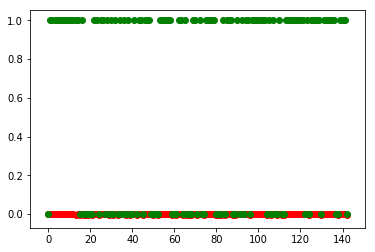

In [15]:
run()